In [ ]:
from google.colab import files
files.upload()  # upload kaggle.json here
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kutaykutlu/drowsiness-detection
!unzip drowsiness-detection.zip -d drowsiness_dataset

Streaming output truncated to the last 5000 lines.
  inflating: drowsiness_dataset/open_eye/s0024_00466_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00467_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00468_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00469_0_1_1_2_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00470_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00471_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00472_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00473_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00474_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00475_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00476_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00477_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00478_0_1_1_0_0_01.png  
  inflating: 

Found 38400 images belonging to 2 classes.
Found 9600 images belonging to 2 classes.

🔧 Training with optimizer: ADAM


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


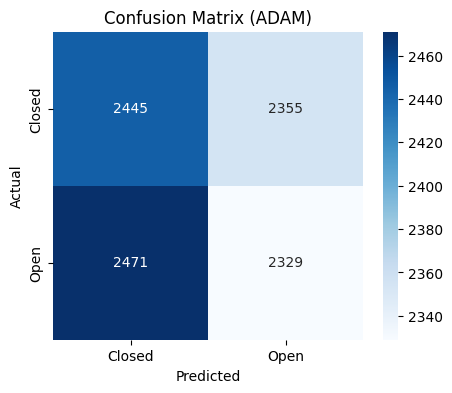


🔧 Training with optimizer: SGD


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


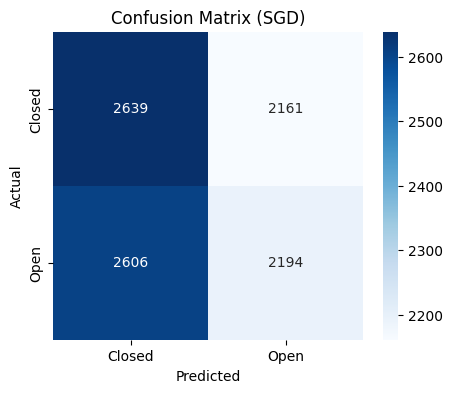


🔧 Training with optimizer: RMSPROP


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


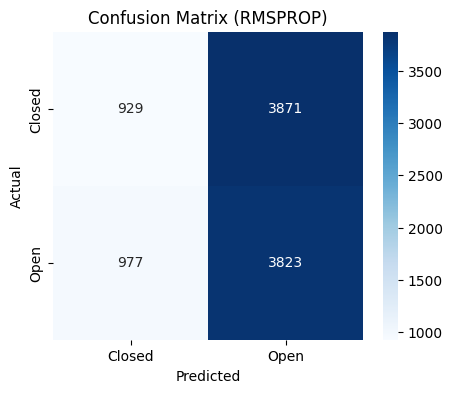


🔍 Optimizer Comparison Results:

🔸 Optimizer: ADAM
Accuracy: 0.4973
Precision: 0.4972
Recall: 0.4852
F1_score: 0.4911
Train_loss: 0.2899
Val_loss: 0.3600

🔸 Optimizer: SGD
Accuracy: 0.5034
Precision: 0.5038
Recall: 0.4571
F1_score: 0.4793
Train_loss: 0.1417
Val_loss: 0.2999

🔸 Optimizer: RMSPROP
Accuracy: 0.4950
Precision: 0.4969
Recall: 0.7965
F1_score: 0.6120
Train_loss: 0.1726
Val_loss: 0.7047


In [ ]:
# 📦 Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Load Dataset
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'drowsiness_dataset',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'drowsiness_dataset',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# ⚙️ CNN Model Definition with Regularization
def build_model(optimizer_name='adam'):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(64, 64, 3)),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        BatchNormalization(),

        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer=optimizer_name, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 🔁 Try Different Optimizers
optimizers = ['adam', 'sgd', 'rmsprop']
results = {}

for opt in optimizers:
    print(f"\n🔧 Training with optimizer: {opt.upper()}")
    model = build_model(optimizer_name=opt)
    history = model.fit(train_generator, epochs=10, validation_data=val_generator, verbose=0)

    y_true = val_generator.classes
    y_pred_probs = model.predict(val_generator)
    y_pred = (y_pred_probs > 0.5).astype('int').flatten()

    acc = np.mean(y_pred == y_true)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    results[opt] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'train_loss': history.history['loss'][-1],
        'val_loss': history.history['val_loss'][-1]
    }

    # Plot Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Closed', 'Open'], yticklabels=['Closed', 'Open'])
    plt.title(f'Confusion Matrix ({opt.upper()})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 📊 Display All Results
print("\n🔍 Optimizer Comparison Results:")
for opt, metrics in results.items():
    print(f"\n🔸 Optimizer: {opt.upper()}")
    for key, val in metrics.items():
        print(f"{key.capitalize()}: {val:.4f}")


In [3]:
# 📦 Import Required Libraries
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from scipy.linalg import sqrtm
from skimage.metrics import structural_similarity as ssim
from scipy.stats import entropy
import numpy as np
import tensorflow as tf

# 🧹 Preprocessing Function for InceptionV3 Input
def preprocess_images_for_inception(images):
    images_resized = tf.image.resize(images, (299, 299)).numpy()
    return preprocess_input(images_resized)

# 🔬 Frechet Inception Distance (FID) Score Calculation
def calculate_fid(real_images, generated_images):
    model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))

    real_images = preprocess_images_for_inception(real_images)
    generated_images = preprocess_images_for_inception(generated_images)

    act1 = model.predict(real_images)
    act2 = model.predict(generated_images)

    mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)

    ssdiff = np.sum((mu1 - mu2) ** 2.0)
    covmean = sqrtm(sigma1.dot(sigma2))

    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

# 🧠 Inception Score (IS) Calculation
def inception_score(predictions, eps=1e-16):
    p_y = np.expand_dims(predictions.mean(axis=0), 0)
    kl_div = predictions * (np.log(predictions + eps) - np.log(p_y + eps))
    score = np.exp(kl_div.sum(axis=1).mean())
    return score

# 🧩 Structural Similarity Index (SSIM) Calculation
def compute_ssim(img1, img2):
    return ssim(img1, img2, channel_axis=-1, data_range=1.0)

# ⚠️ Simulation with Random Dummy Data
real_images = np.random.rand(10, 299, 299, 3).astype(np.float32)
generated_images = np.random.rand(10, 299, 299, 3).astype(np.float32)

fid_score = calculate_fid(real_images, generated_images)

img1 = np.random.rand(299, 299, 3).astype(np.float32)
img2 = np.random.rand(299, 299, 3).astype(np.float32)
ssim_score = compute_ssim(img1, img2)

# Simulated Softmax Class Probabilities
fake_predictions = np.random.rand(10, 5)
fake_predictions /= fake_predictions.sum(axis=1, keepdims=True)
inception_score_value = inception_score(fake_predictions)

# 📊 Display Scores
print("\n🎯 Evaluation Metrics on Dummy Data (Lab 9)")
print(f"FID Score: {fid_score:.4f}")
print(f"SSIM Score: {ssim_score:.4f}")
print(f"Inception Score: {inception_score_value:.4f}")

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

🎯 Evaluation Metrics on Dummy Data (Lab 9)
FID Score: 0.0649
SSIM Score: 0.0046
Inception Score: 1.1808
